# Intro to NumPy

-  [based on this numpy quickstart guide](https://docs.scipy.org/doc/numpy/user/quickstart.html)

-  [full list of routines](https://docs.scipy.org/doc/numpy-dev/reference/routines.html#routines)

In [1]:
# import numpy and other stuff for this tutorial
import numpy as np # make your own alias for numpy
from numpy import pi
import matplotlib.pyplot as plt # ploting module.
from scipy.stats import norm

## initialize array and a few basic operations

In [2]:
# set up an array and figure out shape...
# DKK how you initialize array and set up data type. 
# if you just type 10, it starts from 0 and end at 9, not including the stoping point. 

my_array = np.arange(10)    # the interval includes `start` but excludes `stop`, overal interval [start...stop-1]
print(my_array)
my_array.shape  # the shape of the data structure

[0 1 2 3 4 5 6 7 8 9]


(10,)

In [4]:
# reshape array (DKK manipulate the shape of the data)
my_array = np.arange(10)
my_array = my_array.reshape(2,5)   # why is (2,5) and (5,2) ok but (2,6) not ok? 
# you can change your array to any shape as long as the number of elements matched. 
# and you can make it to more than 2-D
my_array2 = np.arange(100)
my_array2 = my_array.reshape(2,2,5)
print(my_array)
my_array.shape   

[[0 1 2 3 4]
 [5 6 7 8 9]]


(2, 5)

In [6]:
# neat trick...can also reshape with 'shape' and use a -1 which means 'whatever works' 
my_array = np.arange(42)
my_array.shape = 2,3,-1  #DKK (if you shouldn't know the last demension, put -1 the python would figure it out)
my_array.shape
print(my_array)

[[[ 0  1  2  3  4  5  6]
  [ 7  8  9 10 11 12 13]
  [14 15 16 17 18 19 20]]

 [[21 22 23 24 25 26 27]
  [28 29 30 31 32 33 34]
  [35 36 37 38 39 40 41]]]


## data types (and remember - strong typed language)

In [7]:
print('Dims of data: ', my_array.ndim)              # number of dims
print('Size of each element (bytes): ', my_array.itemsize)          # size of each element in bytes
print('Total number of elements in array: ', my_array.size)         # total number of elements in array
print('Name of data type: ', my_array.dtype.name)   # name of data type (float, int32, int64 etc) 

Dims of data:  3
Size of each element (bytes):  4
Total number of elements in array:  42
Name of data type:  int32


In [9]:
# will infer data type based on input values...here we have 1 float so the whole thing is float
float_array = np.array([1.1,2,3])  
float_array.dtype.name             # or np.dtype

'int32'

In [10]:
# DKK tell nmpy exactly what data type you want. float64 is the default. 
int_array = np.array([[1,2,3], [6,7,8]], dtype = 'int64')   # complex, float32, float64, int32, uint32 (unsigned int32), etc
int_array.dtype
print(int_array.shape)
int_array
int_array.dtype.name

(2, 3)


'int64'

<div class="alert alert-success">
what happens if you initialize with floating point numbers but you declare an int data type?
</div>

In [11]:
int_array = np.array([[1.1,2.7,3.4], [6.9,7.5,8.2]], dtype = 'int64')   # complex, float32, float64, int32, uint32 (unsigned int32), etc
int_array
# DKK it will chope the decimal part off if you mislabled as int. 
# DKK change to 'float64' would retain the decimal information. 

array([[1, 2, 3],
       [6, 7, 8]], dtype=int64)

## Allocate arrays of zeros, ones or rand to reserve the memory before filling up later 

<div class="alert alert-info">
handy when you know what size you need, but you're not ready to fill it up yet...saves you from dynamically resizing the matrix during analysis, which is very slow
</div>

In [12]:
# note the () around the dims because you specify as a tuple...default type is float64
# DKK know your output would be 3by4 matrics.
zero_array = np.zeros( (3,4) )  # DKK specify a tuple for the size of a matrics 
print('Data type:', zero_array.dtype)

# explicilty declare data type
zero_array = np.zeros( (3,4), dtype=np.int32)   # 
print('Data type:', zero_array.dtype)
print(zero_array)

Data type: float64
Data type: int32
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [14]:
# ones
# note the 3D output below...4, 4x4 squares of floating point 1s...
np.ones( (4,4,4), dtype=np.float64 ) * 10           

array([[[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]]])

In [ ]:
# and empty...not really 'empty' but initialized with varible output determined by current state of memory
np.empty( (2,2,2), dtype = np.float32)

## Can also create sequences of numbers using arange...

In [15]:
seq_array = np.arange(10)    # 0-9...remember - counting starts at 0! 
print(seq_array)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
# can specify start, stop and step (not the same sequence as matlab)
seq_array = np.arange(0,30,5)     # start, stop (stop at < X), step size
print(seq_array)
# note that 30 is not in there...

[ 0  5 10 15 20 25]


In [20]:
seq_array = np.arange(0,10,.5)    # decimal input is ok too (and again - stop is NOT included)
print(seq_array)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


<div class="alert alert-info">
Because of machine precision issues, sometimes hard to predict how many elements will end up in an array when initialized using arange...so often better to specify a sequence based on start point, stop point, and the exact number of elements that you want (or the number of steps between start and stop). linspace (linear spacing) is the function to do this, and note that unlike arange that ends < stop point, linspace will always end exactly at the specified stop point. 
</div>

In [18]:
# start, stop, number of linearly spaced steps between start and stop...note that start AND stop included!
lin_array = np.linspace(0,20,9) 
print(lin_array)

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ]


## Common use of linspace in this class...eval a function over an interval. quick intro to basic plotting here too...

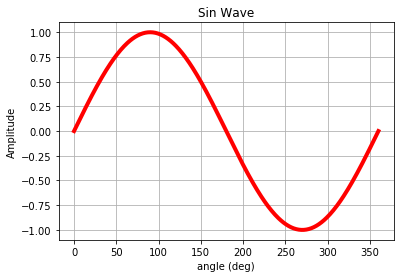

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: :mod:`A valid 

In [21]:
lin_array = np.linspace(0, 2*pi, 360)
sin_wave = np.sin(lin_array)

# plotting
#(r-red, b-blue, k-black)
h = plt.plot(lin_array*180/pi, sin_wave, 'r-', linewidth = 4)    # specify x,y data...convert rad to deg for x-axis

# label each axis and give it a title
plt.xlabel('angle (deg)')
plt.ylabel('Amplitude')
plt.title('Sin Wave')
plt.grid(1)
plt.show()

# figure out all settings to tweak...
plt.setp(h) 



## initializing arrays with random numbers...use np.random.rand and np.random.randn

In [25]:
rand_array = np.random.rand(1,16)   # drawn from uniform over [0,1], dkk random pulling from 0-1
print(rand_array)
np.round(rand_array)
print(rand_array)

[[0.82158788 0.55201772 0.3540402  0.67667714 0.79782552 0.01118244
  0.62380714 0.04476179 0.13695558 0.08513649 0.89775637 0.24815531
  0.95913062 0.99883722 0.1036054  0.04078474]]
[[0.82158788 0.55201772 0.3540402  0.67667714 0.79782552 0.01118244
  0.62380714 0.04476179 0.13695558 0.08513649 0.89775637 0.24815531
  0.95913062 0.99883722 0.1036054  0.04078474]]


In [26]:
rand_array = np.random.randn(2,6)   # drawn from normal with mean 0 and variance 1
print(rand_array)

[[-0.07326539 -0.35204859  1.04530535 -0.21329717  1.99417132  0.24050186]
 [ 0.16321505  1.9534341   0.09643967 -2.92233987  0.01445287 -0.37737297]]


## use randn to generate draws from a normal distribtion with mean = mu and variance = sig and then plot...

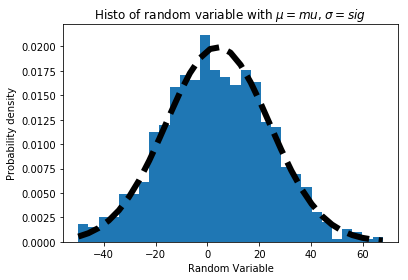

In [27]:
# shift the mean and scale the variance for a N(mu,var)
samples = 1000
mu = 4
sig = 20

# generate the array of rand numbers 
rand_array = (sig * np.random.randn(samples,1)) + mu   # drawn from normal with mean mu and variance sig
rand_array

# plot
num_bins = 30

fig, ax = plt.subplots() #(2,2)

# generate the histogram
n, bins, patches = ax.hist(rand_array, num_bins, density=1)

# generate a pdf evaled at 'bins' to draw a smooth function - this works because we used randn to generate the data
y = norm.pdf(bins, mu, sig)
ax.plot(bins, y, 'k--', linewidth = 6)
ax.set_xlabel('Random Variable')
ax.set_ylabel('Probability density')
ax.set_title('Histo of random variable with $\mu=mu$, $\sigma=sig$')

# show the plot
plt.show()


## Simple elementwise arithmetic operations like + and - work on corresponding elements of arrays. More on linear algebra in separate tutorial

[0.00000000e+00 8.93507819e-07 7.14773412e-06 2.41217554e-05
 5.71713644e-05 1.11647430e-04 1.92894258e-04 3.06247954e-04
 4.57034788e-04 6.50569566e-04 8.92153998e-04 1.18707508e-03
 1.54060346e-03 1.95799185e-03 2.44447338e-03 3.00526004e-03
 3.64554105e-03 4.37048126e-03 5.18521963e-03 6.09486758e-03
 7.10450746e-03 8.21919102e-03 9.44393780e-03 1.07837336e-02
 1.22435291e-02 1.38282382e-02 1.55427363e-02 1.73918593e-02
 1.93804018e-02 2.15131157e-02 2.37947088e-02 2.62298430e-02
 2.88231336e-02 3.15791472e-02 3.45024005e-02 3.75973591e-02
 4.08684361e-02 4.43199904e-02 4.79563258e-02 5.17816895e-02
 5.58002707e-02 6.00161994e-02 6.44335453e-02 6.90563163e-02
 7.38884574e-02 7.89338494e-02 8.41963080e-02 8.96795821e-02
 9.53873531e-02 1.01323234e-01 1.07490767e-01 1.13893424e-01
 1.20534606e-01 1.27417638e-01 1.34545773e-01 1.41922190e-01
 1.49549989e-01 1.57432195e-01 1.65571754e-01 1.73971536e-01
 1.82634326e-01 1.91562834e-01 2.00759685e-01 2.10227422e-01
 2.19968508e-01 2.299853

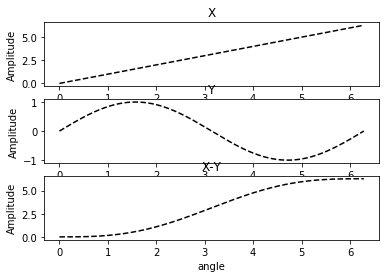

In [28]:
x = np.linspace(0,2*pi,360)
y = np.sin(x)

print(x-y) # default, element by element

plt.subplot(3, 1, 1)
plt.plot(x, x, 'k--')
plt.title('X')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(x, y, 'k--')
plt.title('Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(x, x-y, 'k--')
plt.title('X-Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')

plt.show()

## Some operations that can modify an existing array


In [29]:
x = np.ones( (1,10) )
print(x)

# then some C style stuff...
x += 3
print(x)

# note that it builds...so the x+=3 modifies x
x *= 2
print(x)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]]
[[8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]]


<div class="alert alert-info">
when dealing with muliple arrays of different data types, resulting array will take the form of the highest precision input array (upcasting)!
</div>

In [30]:
x = np.arange(10, dtype='int32')
print('x data type: ', x.dtype)

y = np.random.randn(1,10)
print('y data type: ', y.dtype)

# now multiply the int32 array with the float64 array and answer should be the higher precision of the two (float64)
z = x * y 
print(z)
print('z data type: ', z.dtype)

x data type:  int32
y data type:  float64
[[-0.          0.76706346  3.7693015  -1.16307171  0.60591694  3.3274135
  -3.19258156  1.16046906 -2.12023256 -4.57389908]]
z data type:  float64


## Unary operations implemented as methods of the ndarray class

In [32]:
x = np.arange(10).reshape(2,5)   # 2 x 5 matrix
print(x)
x.sum()                          # sum of all elements 
# Row is the first demension and column is second. 
print(x.sum(axis=0))             # sum of each column (across 1st dim); sum across the rows
print(x.sum(axis=1))             # sum of each row (across 2nd dim); sum across the columns
print(x.sum(0))                  # don't need the axis arg; same as the axis = 0.
print(x.sum())

[[0 1 2 3 4]
 [5 6 7 8 9]]
[ 5  7  9 11 13]
[10 35]
[ 5  7  9 11 13]
45


## Other common operations...

0.10090796068045194
[0.12156931 0.10090796 0.16143272]
[0.94345533 0.90902163 0.90218259 0.8142145  0.57210547 0.96263512
 0.72810517 0.92039423 0.73153005 0.81703539 0.69400101 0.63059027]
[[0.82506354 0.3215978  0.30341316]
 [0.90902163 0.46135014 0.24924348]
 [0.12156931 0.10967771 0.01770557]
 [0.46371056 0.30662931 0.24966203]
 [0.23678937 0.08891857 0.0508708 ]
 [0.96263512 0.16812323 0.03902754]
 [0.46051864 0.2390506  0.17405398]
 [0.59484551 0.14227581 0.13094983]
 [0.64059013 0.46861093 0.23222923]
 [0.68167954 0.08441581 0.0689707 ]
 [0.69400101 0.07003023 0.02729218]
 [0.17314849 0.10918575 0.0236096 ]]


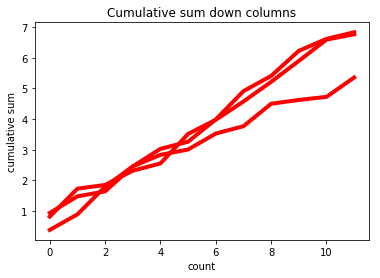

In [33]:
x = np.random.rand(12,3)  
print(x.min())           # min of entire matrix
print(x.min(0))          # min across 1st dim
print(x.max(1))          # max across 2nd dim
print(x.cumprod(1))      # cumulative product across 2nd dim
y = x.cumsum(0)          # cumulative sum across 1st dim

r,c = y.shape
plt.plot(np.arange(r), y, 'r-', linewidth = 4)    
plt.xlabel('count')
plt.ylabel('cumulative sum')
plt.title('Cumulative sum down columns')
plt.show() 

## Universal functions...sin, exp, corrcoef, etc

[1.00000000e+00 1.36389534e+00 1.86021050e+00 2.53713244e+00
 3.46038312e+00 4.71960041e+00 6.43704102e+00 8.77945026e+00
 1.19742513e+01 1.63316256e+01 2.22746281e+01 3.03802615e+01
 4.14354971e+01 5.65136815e+01 7.70787469e+01 1.05127344e+02
 1.43382695e+02 1.95558989e+02 2.66721994e+02 3.63780886e+02
 4.96159055e+02 6.76709025e+02 9.22960286e+02 1.25882124e+03
 1.71690042e+03 2.34167248e+03 3.19379619e+03 4.35600375e+03
 5.94113322e+03 8.10308393e+03]
[0.         0.55708601 0.7878386  0.96490128 1.11417203 1.2456822
 1.36457648 1.47391105 1.57567719 1.67125804 1.76166066 1.84764529
 1.92980256 2.00860219 2.084425   2.15758486 2.22834406 2.29692448
 2.36351579 2.42828164 2.4913644  2.55288883 2.61296502 2.67169067
 2.72915296 2.78543007 2.84059246 2.89470384 2.94782211 3.        ]
[ 2.          2.62068966  3.24137931  3.86206897  4.48275862  5.10344828
  5.72413793  6.34482759  6.96551724  7.5862069   8.20689655  8.82758621
  9.44827586 10.06896552 10.68965517 11.31034483 11.93103448

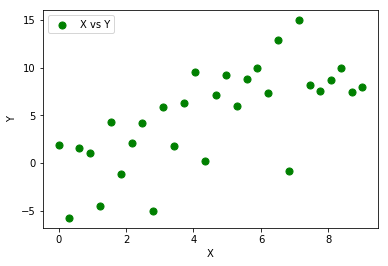

In [34]:
N = 30
x = np.linspace(0,9,N)

print(np.exp(x))
print(np.sqrt(x))
print(np.add(x, x+2))                 # add two same-sized arrays
y = x + np.random.randn(1,len(x))*3   # make a second vector x + some randn noise 
print(np.corrcoef(x, y))              # correlation matrix

plt.scatter(x, y, s=50, c='green', alpha=1, label="X vs Y")  # note alpha or transparency
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=2)   # 1-4 for each corner of the plot
plt.show()

# all, any, apply_along_axis, argmax, argmin, argsort, average, ...
# bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, ...
# diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, ...
# min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, ...
# transpose, var, vdot, vectorize, where

## Set logic....

In [35]:
x = np.arange(20)
y = np.linspace(0, 20, 21)
print(x)
print(y)

z = np.union1d(x,y) # dkk, get the union od x and y
print(z)

z = np.intersect1d(x,y) #dkk, find the commonalities 
print(z)

z = np.unique([np.append(x,y)])
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


## Shape manipulation

In [ ]:
x = np.round(np.random.randn(6,8)*5)   # generate some random data from N(0,5), then round 

# flatten the array, dkk like the MATLAB x(:) if you flat it turen a multidementional matrics to 1D vector 
y = x.ravel()   
print('Shape of x: ', x.shape, '\nShape of flattened x:', y.shape)  # newline example + multiple outputs...

# reshape
x = x.reshape(12,4)   # 48 element array reshaped from a 6x8 to a 12x4

# transpose - swap row/column
print(x.T)
print('Reshaped x: ', x.shape, '\nReshaped x transposed: ', x.T.shape)

## Concatenating arrays (stacking)

In [ ]:
# use floor and ceil to make two 5x6 arrays of rand numbers
x = np.floor(np.random.rand(5,6)*10)
y = np.ceil(np.random.rand(5,6)*2)

# vertical stacking of arrays...will make a 10x6, dkk adding more rows 
z = np.vstack((x,y))
print('shape of z after vert stacking x,y: ', z.shape)

# horizontal stacking of arrays...will make a 5x12, dkk adding more column 
z = np.hstack((x,y))
print('shape of z after horizontal stacking x,y: ', z.shape)

# concatenate allows stacking along specified dim
z = np.concatenate((x,y),axis=0)   # vstack - stack rows on top of each other
print('shape of z after vertical concat x,y: ', z.shape)

z = np.concatenate((x,y),axis=1)   # hstack - stack columns next to each other
print('shape of z after horizontal concat x,y: ', z.shape)


## References and reasignments (copies)...this is important because failure to understand this can have unintended consequences 

In [36]:
x = np.arange(12)
print(x.shape)
y = x                   # creates another name to refer to x
print(y is x)           # y and x are the same object, so true

y.shape = 3,4    # because y is another name for x, this changes shape of x
print(x.shape)   # now x is a different size...  

(12,)
True
(3, 4)


## if you want to make a new object that looks at the same data but that is not simply a reference to the same object (i.e. create a new 'view' of the data)

In [37]:
x = np.linspace(0,9,10)

y = x.view()

print(y is x)        # no...

print(y.base is x)   # yes, because looking at the same data. 

# so you can change the shape of y and not affect x
y.shape = 2,5
print('Shape of x: ', x.shape, ' Shape of y: ', y.shape)

# but since the data is shared, changing data in y changes data in x
y[0,0] = 1000
print(x[0,])

False
True
Shape of x:  (10,)  Shape of y:  (2, 5)
1000.0


## Deep copy - make a complete copy of an array and its data...not just a view

<div class="alert alert-warning">
changing the copy will NOT change the original...and this is often a very desirable feature!
</div>

In [38]:
z = x.copy()
print(z is x)       # not the same
print(z.base is x)  # does not share the same data

z[0] = -999         # since z is an independent copy, changing the data in z does not change x

print(x)

False
False
[1000.    1.    2.    3.    4.    5.    6.    7.    8.    9.]
